In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Imputation for completing missing values using k-Nearest Neighbors.
from sklearn.impute import KNNImputer
#for cross validation
from sklearn.model_selection import KFold
#for K-nearest neighbors, try hamming, Euclidean and dot product
from sklearn.neighbors import KNeighborsClassifier
#for decision tree
from sklearn.tree import DecisionTreeClassifier
# for Random Forest, this is one of the ensemble learning
from sklearn.ensemble import RandomForestClassifier
#for support vectors machine, we should import support vectors classifier, it might have different kernal
#Like: polynomial kernel and RBF kernal and linear kernel 
from sklearn.svm import SVC
#for NN, we might need tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#for bonus points, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
header = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
data = pd.read_csv(r"Data\letter-recognition.data",names=header)
#choose a pair of  H and K, 数据集中 0-733是H class 72，后面是K class 75 
dataset_H = data.loc[data[0] == "H"]
dataset_H = dataset_H.replace("H", ord("H")) 
dataset_K = data.loc[data[0] == "K"]
dataset_K = dataset_K.replace("K", ord("K")) 
dataset_H_and_K = dataset_H.append(dataset_K, ignore_index=True)
#M and Y, dataset_M_and_Y 0-791 是M class77， 后面的是Y class 89
dataset_M = data.loc[data[0] == "M"]
dataset_M = dataset_M.replace("M", ord("M")) 
dataset_Y = data.loc[data[0] == "Y"]
dataset_Y = dataset_Y.replace("Y", ord("Y")) 
dataset_M_and_Y = dataset_M.append(dataset_Y, ignore_index=True )
#L and Z, 总集合中 0-760是L class 76，后面的是Z class 90
dataset_L = data.loc[data[0] == "L"]
dataset_L = dataset_L.replace("L", ord("L")) 
dataset_Z = data.loc[data[0] == "Z"]
dataset_Z = dataset_Z.replace("Z", ord("Z")) 
dataset_L_and_Z = dataset_L.append(dataset_Z, ignore_index=True )

#split three dataset into train and test

#pair of H and K
X_H_and_K = np.array(dataset_H_and_K.drop(0, axis=1))
Y_H_and_K = np.array(dataset_H_and_K[0])
#pair of M and Y
X_M_and_Y = np.array(dataset_M_and_Y.drop(0, axis=1))
Y_M_and_Y = np.array(dataset_M_and_Y[0])
#pair of L and Z
X_L_and_Z = np.array(dataset_L_and_Z.drop(0, axis=1))
Y_L_and_Z = np.array(dataset_L_and_Z[0])

#Set training and testing set for each pair, after reshape they will become one row
#pair of H and K
X_H_and_K_train, X_H_and_K_value, Y_H_and_K_train, Y_H_and_K_value = train_test_split(X_H_and_K, Y_H_and_K , test_size=0.1, random_state=42) #42
Y_H_and_K_train_reshaped = Y_H_and_K_train.reshape(-1, 1)
Y_H_and_K_value_reshaped = Y_H_and_K_value.reshape(-1, 1)
#pair of M and Y
X_M_and_Y_train, X_M_and_Y_value, Y_M_and_Y_train, Y_M_and_Y_value = train_test_split(X_M_and_Y, Y_M_and_Y, test_size=0.1, random_state=42) #42
Y_M_and_Y_train_reshaped = Y_M_and_Y_train.reshape(-1, 1)
Y_M_and_Y_value_reshaped = Y_M_and_Y_value.reshape(-1, 1)
#pair of M and Y
X_L_and_Z_train, X_L_and_Z_value, Y_L_and_Z_train, Y_L_and_Z_value = train_test_split(X_L_and_Z, Y_L_and_Z, test_size=0.1, random_state=42) #42
Y_L_and_Z_train_reshaped = Y_L_and_Z_train.reshape(-1, 1)
Y_L_and_Z_value_reshaped = Y_L_and_Z_value.reshape(-1, 1)


Here I will select top 4 features with highest variance explained

[0.4083498281731928, 0.23239531856277879, 0.10635419299764207, 0.07288729947295296, 0.0472414362414639, 0.026722175651615183, 0.02481854098316382, 0.018012064552938644, 0.014859936084416808, 0.012827828335806334, 0.009339473875983847, 0.008253039032662002, 0.006621050913133657, 0.005283555279800717, 0.0038316134721694717, 0.002202646370279106]


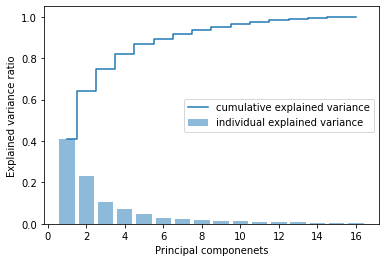

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_H_and_K_train_standard = sc.fit(X_H_and_K_train)
cov_mat = np.cov(X_H_and_K_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 17) , var_exp, alpha = 0.5, align='center', label = 'individual explained variance')
plt.step(range(1, 17), cum_var_exp, where ='mid', label = 'cumulative explained variance')
plt.ylabel("Explained variance ratio")
plt.xlabel('Principal componenets')
plt.legend(loc = "best")
plt.show()

Given the question is that we need to reduce dimension from 16 to 4. Therefore, I will choose the first four features for training and testing dataset for each model for final validation.

In [4]:
#pair of H and K
X_H_and_K = np.array(dataset_H_and_K.drop(0, axis=1))
X_H_and_K = X_H_and_K[:,:4]
Y_H_and_K = np.array(dataset_H_and_K[0])
#pair of M and Y
X_M_and_Y = np.array(dataset_M_and_Y.drop(0, axis=1))
X_M_and_Y = X_M_and_Y[:,:4]
Y_M_and_Y = np.array(dataset_M_and_Y[0])
#pair of L and Z
X_L_and_Z = np.array(dataset_L_and_Z.drop(0, axis=1))
X_L_and_Z = X_L_and_Z[:,:4]
Y_L_and_Z = np.array(dataset_L_and_Z[0])

#Set training and testing set for each pair, after reshape they will become one row
#pair of H and K
X_H_and_K_train, X_H_and_K_value, Y_H_and_K_train, Y_H_and_K_value = train_test_split(X_H_and_K, Y_H_and_K , test_size=0.1, random_state=1) 
Y_H_and_K_train_reshaped = Y_H_and_K_train.reshape(-1, 1)
Y_H_and_K_value_reshaped = Y_H_and_K_value.reshape(-1, 1)
#pair of M and Y
X_M_and_Y_train, X_M_and_Y_value, Y_M_and_Y_train, Y_M_and_Y_value = train_test_split(X_M_and_Y, Y_M_and_Y, test_size=0.1, random_state=1) 
Y_M_and_Y_train_reshaped = Y_M_and_Y_train.reshape(-1, 1)
Y_M_and_Y_value_reshaped = Y_M_and_Y_value.reshape(-1, 1)
#pair of M and Y
X_L_and_Z_train, X_L_and_Z_value, Y_L_and_Z_train, Y_L_and_Z_value = train_test_split(X_L_and_Z, Y_L_and_Z, test_size=0.1, random_state=1) 
Y_L_and_Z_train_reshaped = Y_L_and_Z_train.reshape(-1, 1)
Y_L_and_Z_value_reshaped = Y_L_and_Z_value.reshape(-1, 1)

After processed data, for each pair, we have training dataset which has 90% of the total amount, 10% data for final validation. All of the strings were transformed into corresponding number b aseb on ASCII encoding. Later we need a function to calculate accuracy.

In [5]:
# for check the accuracy for each model
def calculateAccuracy(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    #This is a binary question, so rather than accuracy_score( y_test, y_pred)
    result = np.mean(Y_pred == Y_test)
    return result

#for Cross validation
crossValidationFold = 5
#It's a dict for store the best hyperparameter
best_models_H_and_K = []
best_models_L_and_Z = []
best_models_M_and_Y = []


1. KNN. The hyperparameter should be K, and I set the range of K is in 1 to 20. 

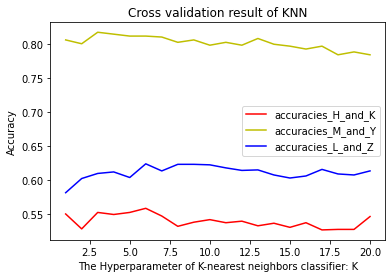

best k value for KNN is 6 with mean accuracy 0.5584905660377358
best k value for KNN is 3 with mean accuracy 0.8169014084507042
best k value for KNN is 6 with mean accuracy 0.6237918215613383


<Figure size 432x288 with 0 Axes>

In [6]:
# k-nearest neighbors classifier
MAX_K_1 = 20
MAX_K_2 = 20
MAX_K_3 = 20
#For accuracy
accuracies_H_and_K = np.zeros(MAX_K_1)
accuracies_M_and_Y = np.zeros(MAX_K_2)
accuracies_L_and_Z = np.zeros(MAX_K_3)


def KNN(MAX_K , accuracies , X_pair_train, Y_pair_train):
    for n_neighbors in range(1, MAX_K + 1):
        model = KNeighborsClassifier(n_neighbors = n_neighbors)
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
            X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
            Y_train_fold, Y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
            model.fit(X_train_fold, Y_train_fold)
            mean_accuracy += calculateAccuracy(model, X_test_fold, Y_test_fold)
        mean_accuracy /= crossValidationFold
        accuracies[n_neighbors - 1] = mean_accuracy

def plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(range(1, MAX_K_1 + 1), accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(range(1, MAX_K_2 + 1), accuracies_M_and_Y, color = 'g', label = "accuracies_M_and_Y")
    plt.plot(range(1, MAX_K_3 + 1), accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('The Hyperparameter of K-nearest neighbors classifier: K')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of KNN')
    plt.legend()
    plt.savefig('./KNNafterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models):
    best_k = np.argmax(accuracies) + 1 #offset
    print(('best k value for KNN is {} with mean accuracy {}').format(best_k,max(accuracies)))
    best_models.append({'name': 'KNN','model': KNeighborsClassifier(n_neighbors=best_k),})

KNN(MAX_K_1, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
KNN(MAX_K_2, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
KNN(MAX_K_3, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)

2.Decision tree. For Decision I choose depth as the Hyperparameter to predict accuracies

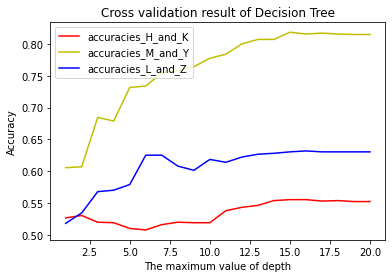

Best maximum value of depth for Decision Tree 16 with mean accuracy 0.5554716981132076
Best maximum value of depth for Decision Tree 15 with mean accuracy 0.8183098591549294
Best maximum value of depth for Decision Tree 16 with mean accuracy 0.6319702602230483


<Figure size 432x288 with 0 Axes>

In [7]:
#the deepest depth I choose is 20, otherwise it is really slow
max_depth_1 = 20
max_depth_2 = 20
max_depth_3 = 20

accuracies_H_and_K = np.zeros(max_depth_1)
accuracies_M_and_Y = np.zeros(max_depth_2)
accuracies_L_and_Z = np.zeros(max_depth_3)


def DecisionTree(max_depth, accuracies, X_pair_train, Y_pair_train):
    for max_depth in range(1, max_depth+ 1):
        model = DecisionTreeClassifier(random_state=0, max_depth=max_depth, criterion='gini')  #random state可以调整嘛
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
                X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
                Y_train_fold, Y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
                model.fit(X_train_fold, Y_train_fold)
                mean_accuracy += calculateAccuracy(model, X_test_fold, Y_test_fold)
                # print(model)
        mean_accuracy /= crossValidationFold
        accuracies[max_depth - 1] = mean_accuracy


def plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(range(1, max_depth_1 + 1), accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(range(1, max_depth_2 + 1), accuracies_M_and_Y, color = 'g', label = "accuracies_M_and_Y")
    plt.plot(range(1, max_depth_3 + 1), accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('The maximum value of depth')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of Decision Tree')
    plt.legend()
    plt.savefig('./DecisionTreeafterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models):
    best_max_depth= np.argmax(accuracies) + 1 #offset
    print(('Best maximum value of depth for Decision Tree {} with mean accuracy {}').format(best_max_depth,max(accuracies)))
    best_models.append({'name': 'Decision Tree','model': DecisionTreeClassifier(random_state=1, max_depth=best_max_depth)})

DecisionTree(max_depth_1, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
DecisionTree(max_depth_2, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
DecisionTree(max_depth_3, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)



3.Random Forest: Same as the decision tree, but we need apply RandomForestClassifier; the hyperparameter is still maximum vlaue of depth

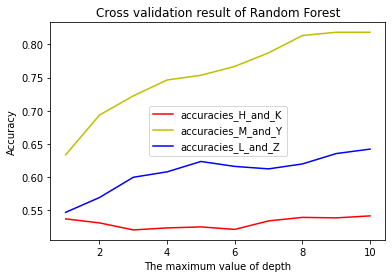

Best maximum value of depth for Random Forest 10 with mean accuracy 0.5418867924528301
Best maximum value of depth for Random Forest 9 with mean accuracy 0.8183098591549296
Best maximum value of depth for Random Forest 10 with mean accuracy 0.6423791821561338


<Figure size 432x288 with 0 Axes>

In [8]:
#the deepest depth I choose is 20, otherwise it is really slow
max_depth = 10
accuracies_H_and_K = np.zeros(max_depth)
accuracies_M_and_Y = np.zeros(max_depth)
accuracies_L_and_Z = np.zeros(max_depth)
def RandomForest(max_depth, accuracies, X_pair_train, Y_pair_train):
    for max_depth in range(1, max_depth+ 1):
        model = RandomForestClassifier(random_state=0, max_depth=max_depth, criterion='gini')  #random state可以调整嘛
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
                X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
                Y_train_fold, Y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
                model.fit(X_train_fold, Y_train_fold)
                mean_accuracy += calculateAccuracy(model, X_test_fold, Y_test_fold)
                # print(model)
        mean_accuracy /= crossValidationFold
        accuracies[max_depth - 1] = mean_accuracy

def plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(range(1, max_depth+ 1), accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(range(1, max_depth+ 1), accuracies_M_and_Y, color = 'g', label = "accuracies_M_and_Y")
    plt.plot(range(1, max_depth+ 1), accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('The maximum value of depth')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of Random Forest')
    plt.legend()
    plt.savefig('./RandomForestafterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models):
    best_max_depth= np.argmax(accuracies) + 1 #offset
    print(('Best maximum value of depth for Random Forest {} with mean accuracy {}').format(best_max_depth,max(accuracies)))
    best_models.append({'name': 'Random Forest','model': RandomForestClassifier(random_state=1, max_depth = best_max_depth)})


RandomForest(max_depth , accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
RandomForest(max_depth , accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
RandomForest(max_depth , accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)


4.SVM, for this part, the kernel of Support Vector Machine could be polynomial, linear and RBF. For RBF kernel, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.[9]

4.1 Polynomial kernel

In [9]:
max_degree= 10

accuracies_H_and_K = np.zeros(max_degree)
accuracies_M_and_Y = np.zeros(max_degree)
accuracies_L_and_Z = np.zeros(max_degree)

def svmPolynomial(max_degree, accuracies, X_pair_train, Y_pair_train):
    for degree in range(1, max_degree+ 1):
        model = SVC(kernel='poly', degree = degree)
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
                X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
                Y_train_fold, Y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
                model.fit(X_train_fold, Y_train_fold)
                mean_accuracy += calculateAccuracy(model, X_test_fold, Y_test_fold)
        mean_accuracy /= crossValidationFold
        accuracies[degree - 1] = mean_accuracy

def plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(range(1, max_degree+ 1), accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(range(1, max_degree+ 1), accuracies_M_and_Y, color = 'y', label = "accuracies_M_and_Y")
    plt.plot(range(1, max_degree+ 1), accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('The max degree of SVM with polynomial kernel') 
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of SVM with polynomial kernel')
    plt.legend()
    plt.savefig('./svmPolynomialafterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models):
    best_degree = np.argmax(accuracies) + 1 
    print(('best degree value for Polynomial SVM is {} with mean accuracy {}').format(best_degree ,max(accuracies)))
    best_models.append({'name': 'SVM with Polynomial kernal','model': SVC(kernel = 'poly', degree = best_degree)})
#For SVM with polynomial kernel
# svmPolynomial(max_degree, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
# svmPolynomial(max_degree, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
# svmPolynomial(max_degree, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
# plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
# find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
# find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
# find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)


4.2For SVM with Linear kernel

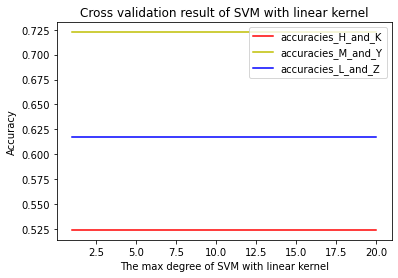

best degree value for linear SVM is 1 with mean accuracy 0.5237735849056604
best degree value for linear SVM is 1 with mean accuracy 0.7225352112676056
best degree value for linear SVM is 1 with mean accuracy 0.6171003717472118


<Figure size 432x288 with 0 Axes>

In [10]:
max_degree= 20
accuracies_H_and_K = np.zeros(max_degree)
accuracies_M_and_Y = np.zeros(max_degree)
accuracies_L_and_Z = np.zeros(max_degree)
def svmLinear(max_degree, accuracies, X_pair_train, Y_pair_train):
    for degree in range(1, max_degree+ 1):
        model = SVC(kernel='linear', degree = degree)
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
                X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
                Y_train_fold, Y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
                model.fit(X_train_fold, Y_train_fold)
                mean_accuracy += calculateAccuracy(model, X_test_fold, Y_test_fold)
                # print(model)
        mean_accuracy /= crossValidationFold
        accuracies[degree - 1] = mean_accuracy


def plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(range(1, max_degree+ 1), accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(range(1, max_degree+ 1), accuracies_M_and_Y, color = 'y', label = "accuracies_M_and_Y")
    plt.plot(range(1, max_degree+ 1), accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('The max degree of SVM with linear kernel') 
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of SVM with linear kernel')
    plt.legend()
    plt.savefig('./svmLinearAfterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models):
    # Save best model
    best_degree = np.argmax(accuracies) + 1 #offset
    print(('best degree value for linear SVM is {} with mean accuracy {}').format(best_degree ,max(accuracies)))
    best_models.append({'name': 'SVM with linear kernal','model': SVC(kernel='linear', degree = best_degree)})

#For SVM with linear kernel
svmLinear(max_degree, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
svmLinear(max_degree, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
svmLinear(max_degree, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)


4.3For SVM with RBF kernel

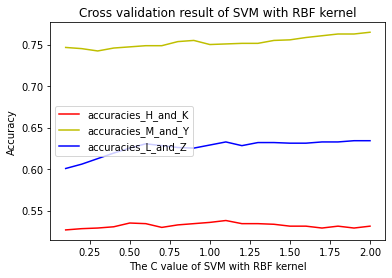

best degree value for RBF SVM is 1.1 with mean accuracy 0.5381132075471698
best degree value for RBF SVM is 2.0 with mean accuracy 0.7647887323943662
best degree value for RBF SVM is 1.9000000000000001 with mean accuracy 0.6342007434944238


<Figure size 432x288 with 0 Axes>

In [11]:
#for RBF
C_values = np.arange(0.1,2.1,0.1) #Step = 0.1
accuracies_H_and_K = np.zeros(len(C_values))
accuracies_M_and_Y = np.zeros(len(C_values))
accuracies_L_and_Z = np.zeros(len(C_values))
def svmRBF(C_values, accuracies, X_pair_train, Y_pair_train):
    for i, C in enumerate(C_values):
        model = SVC(kernel='rbf', C = C)
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
                X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
                Y_train_fold, Y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
                model.fit(X_train_fold, Y_train_fold)
                mean_accuracy += calculateAccuracy(model, X_test_fold, Y_test_fold)
                # print(model)
        mean_accuracy /= crossValidationFold
        accuracies[i] = mean_accuracy

def plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(C_values, accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(C_values, accuracies_M_and_Y, color = 'y', label = "accuracies_M_and_Y")
    plt.plot(C_values, accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('The C value of SVM with RBF kernel') 
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of SVM with RBF kernel')
    plt.legend()
    plt.savefig('./svmRBFAfterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models):
    # Save best model
    best_C = C_values[np.argmax(accuracies)]
    print(('best degree value for RBF SVM is {} with mean accuracy {}').format(best_C,max(accuracies)))
    best_models.append({'name': 'SVM with RBF kernal','model': SVC(kernel='rbf', C = best_C)})

#For SVM with linear kernel
svmRBF(C_values, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
svmRBF(C_values, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
svmRBF(C_values, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
plot(accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)


5. ANN: artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another[10]. For this project, I would like to apply different activation function as hyperparameter, like: ReLU Function and Sigmoid[11]

5.1 NN with  Sigmoid Function

Epoch 1/10
34/34 [==============================] - 0s 727us/step - loss: 0.7823 - accuracy: 0.4981
Epoch 2/10
34/34 [==============================] - 0s 645us/step - loss: 0.7602 - accuracy: 0.4981
Epoch 3/10
34/34 [==============================] - 0s 704us/step - loss: 0.7423 - accuracy: 0.4981
Epoch 4/10
34/34 [==============================] - 0s 967us/step - loss: 0.7278 - accuracy: 0.4981
Epoch 5/10
34/34 [==============================] - 0s 938us/step - loss: 0.7168 - accuracy: 0.4972
Epoch 6/10
34/34 [==============================] - 0s 909us/step - loss: 0.7099 - accuracy: 0.4934
Epoch 7/10
34/34 [==============================] - 0s 791us/step - loss: 0.7049 - accuracy: 0.4925
Epoch 8/10
34/34 [==============================] - 0s 733us/step - loss: 0.7016 - accuracy: 0.4962
Epoch 9/10
34/34 [==============================] - 0s 704us/step - loss: 0.6989 - accuracy: 0.4943
Epoch 10/10
9/9 [==============================] - 0s 692us/step - loss: 0.6937 - accuracy: 0.5094
E

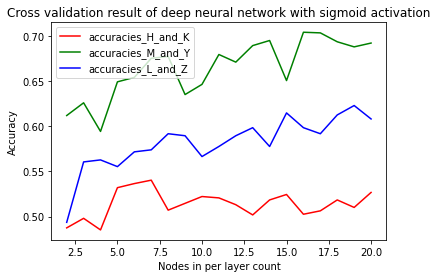

best node count per layer value for NN  with sigmoid is 7 with mean accuracy0.5403773427009583
best node count per layer value for NN  with sigmoid is 16 with mean accuracy0.7042253494262696
best node count per layer value for NN  with sigmoid is 19 with mean accuracy0.6230483293533325


<Figure size 432x288 with 0 Axes>

In [12]:
#One-hot, may be need to change position

Y_H_and_K_train_oneHot = np.array(pd.get_dummies(Y_H_and_K_train))
Y_M_and_Y_train_oneHot = np.array(pd.get_dummies(Y_M_and_Y_train))
Y_L_and_Z_train_oneHot = np.array(pd.get_dummies(Y_L_and_Z_train))

Y_H_and_K_value_oneHot = np.array(pd.get_dummies(Y_H_and_K_value))
Y_M_and_Y_value_oneHot = np.array(pd.get_dummies(Y_M_and_Y_value))
Y_L_and_Z_value_oneHot = np.array(pd.get_dummies(Y_L_and_Z_value))


node_per_layer_H_and_K = np.arange(2,21,1)
node_per_layer_M_and_Y = np.arange(2,21,1)
node_per_layer_L_and_Z = np.arange(2,21,1)

accuracies_H_and_K = np.zeros(len(node_per_layer_H_and_K))
accuracies_M_and_Y = np.zeros(len(node_per_layer_M_and_Y))
accuracies_L_and_Z = np.zeros(len(node_per_layer_L_and_Z))

def NNSigmoid(node_per_layer, accuracies, X_pair_train, Y_pair_train_oneHot):
    for i, input in enumerate(node_per_layer):
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
            model = keras.Sequential(name="sigmoid_model")
            model.add(layers.Dense(input, activation="sigmoid"))
            model.add(layers.Dense(2, activation="softmax"))
            model.compile(optimizer='adam', loss='categorical_crossentropy'
            , metrics=['accuracy'])
            
            X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
            Y_train_fold, Y_test_fold = Y_pair_train_oneHot[train_index], Y_pair_train_oneHot[test_index]
            model.fit(X_train_fold, Y_train_fold, epochs = 10) 
            
            
            _, val_acc = model.evaluate(X_test_fold, Y_test_fold)
            mean_accuracy += val_acc
        mean_accuracy /= crossValidationFold
        accuracies[i] = mean_accuracy

def plot(node_per_layer_H_and_K, node_per_layer_M_and_Y, node_per_layer_L_and_Z,
accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(node_per_layer_H_and_K, accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(node_per_layer_M_and_Y, accuracies_M_and_Y, color = 'g', label = "accuracies_M_and_Y")
    plt.plot(node_per_layer_L_and_Z, accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('Nodes in per layer count')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of deep neural network with sigmoid activation')
    plt.legend()
    plt.savefig('./NNSigmoidAfterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models, node_per_layer):
    best_node = node_per_layer[np.argmax(accuracies)]
    print('best node count per layer value for NN  with sigmoid is {} with mean accuracy{}'
    .format(best_node, max(accuracies)))
    best_models.append({
        'name': 'Model with sigmoid activation function',
        'best_node': best_node,
    })



NNSigmoid(node_per_layer_H_and_K, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train_oneHot)
NNSigmoid(node_per_layer_M_and_Y, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train_oneHot)
NNSigmoid(node_per_layer_L_and_Z, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train_oneHot)
#plot
plot(node_per_layer_H_and_K, node_per_layer_M_and_Y, node_per_layer_L_and_Z,
accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K, node_per_layer_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y, node_per_layer_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z, node_per_layer_L_and_Z)

5.2 For NN with ReLU

Epoch 1/10
34/34 [==============================] - 0s 568us/step - loss: 0.6932 - accuracy: 0.4811
Epoch 2/10
34/34 [==============================] - 0s 616us/step - loss: 0.6932 - accuracy: 0.4981
Epoch 3/10
34/34 [==============================] - 0s 733us/step - loss: 0.6931 - accuracy: 0.5113
Epoch 4/10
34/34 [==============================] - 0s 850us/step - loss: 0.6932 - accuracy: 0.5019
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5019
Epoch 6/10
34/34 [==============================] - 0s 997us/step - loss: 0.6932 - accuracy: 0.5019
Epoch 7/10
34/34 [==============================] - 0s 848us/step - loss: 0.6932 - accuracy: 0.5019
Epoch 8/10
34/34 [==============================] - 0s 790us/step - loss: 0.6932 - accuracy: 0.5019
Epoch 9/10
34/34 [==============================] - 0s 703us/step - loss: 0.6932 - accuracy: 0.5019
Epoch 10/10
34/34 [==============================] - 0s 938us/step - loss: 0.6932 - accuracy: 0.5019
9

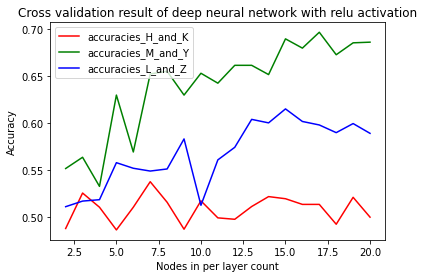

best node count per layer value for NN  with relu activation is 7 with mean accuracy0.5373584747314453
best node count per layer value for NN  with relu activation is 17 with mean accuracy0.6964788675308228
best node count per layer value for NN  with relu activation is 15 with mean accuracy0.6148699045181274


<Figure size 432x288 with 0 Axes>

In [13]:
Y_H_and_K_train_oneHot = np.array(pd.get_dummies(Y_H_and_K_train))
Y_M_and_Y_train_oneHot = np.array(pd.get_dummies(Y_M_and_Y_train))
Y_L_and_Z_train_oneHot = np.array(pd.get_dummies(Y_L_and_Z_train))


node_per_layer_H_and_K = np.arange(2,21,1)
node_per_layer_M_and_Y = np.arange(2,21,1)
node_per_layer_L_and_Z = np.arange(2,21,1)

accuracies_H_and_K = np.zeros(len(node_per_layer_H_and_K))
accuracies_M_and_Y = np.zeros(len(node_per_layer_M_and_Y))
accuracies_L_and_Z = np.zeros(len(node_per_layer_L_and_Z))

def NNRelu(node_per_layer, accuracies, X_pair_train, Y_pair_train_oneHot):
    for i, input in enumerate(node_per_layer):
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
            model = keras.Sequential(name="relu_model")
            model.add(layers.Dense(input, activation="relu"))
            model.add(layers.Dense(2, activation="softmax"))
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            
            X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
            Y_train_fold, Y_test_fold = Y_pair_train_oneHot[train_index], Y_pair_train_oneHot[test_index]
            model.fit(X_train_fold, Y_train_fold, epochs = 10) 

            val_loss, val_acc = model.evaluate(X_test_fold, Y_test_fold, verbose=2)
            mean_accuracy += val_acc
        mean_accuracy /= crossValidationFold
        accuracies[i] = mean_accuracy

def plot(node_per_layer_H_and_K, node_per_layer_M_and_Y, node_per_layer_L_and_Z,
accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(node_per_layer_H_and_K, accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(node_per_layer_M_and_Y, accuracies_M_and_Y, color = 'g', label = "accuracies_M_and_Y")
    plt.plot(node_per_layer_L_and_Z, accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('Nodes in per layer count')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of deep neural network with relu activation')
    plt.legend()
    plt.savefig('./NNReluAfterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models, node_per_layer):
    best_node = node_per_layer[np.argmax(accuracies)]
    print('best node count per layer value for NN  with relu activation is {} with mean accuracy{}'
    .format(best_node, max(accuracies)))
    best_models.append({
        'name': 'Model with Relu activation function',
        'best_node': best_node,
    })



NNRelu(node_per_layer_H_and_K, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train_oneHot)
NNRelu(node_per_layer_M_and_Y, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train_oneHot)
NNRelu(node_per_layer_L_and_Z, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train_oneHot)
#plot
plot(node_per_layer_H_and_K, node_per_layer_M_and_Y, node_per_layer_L_and_Z,
accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K, node_per_layer_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y, node_per_layer_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z, node_per_layer_L_and_Z)

5.3 For NN with tanh kernel

Epoch 1/10
34/34 [==============================] - 0s 677us/step - loss: 0.8028 - accuracy: 0.5019
Epoch 2/10
34/34 [==============================] - 0s 591us/step - loss: 0.7642 - accuracy: 0.5019
Epoch 3/10
34/34 [==============================] - 0s 616us/step - loss: 0.7339 - accuracy: 0.5019
Epoch 4/10
34/34 [==============================] - 0s 645us/step - loss: 0.7127 - accuracy: 0.5028
Epoch 5/10
34/34 [==============================] - 0s 645us/step - loss: 0.7024 - accuracy: 0.5028
Epoch 6/10
34/34 [==============================] - 0s 792us/step - loss: 0.6977 - accuracy: 0.5075
Epoch 7/10
34/34 [==============================] - 0s 587us/step - loss: 0.6959 - accuracy: 0.5208
Epoch 8/10
34/34 [==============================] - 0s 674us/step - loss: 0.6950 - accuracy: 0.5208
Epoch 9/10
34/34 [==============================] - 0s 909us/step - loss: 0.6943 - accuracy: 0.5226
Epoch 10/10
34/34 [==============================] - 0s 909us/step - loss: 0.6942 - accuracy: 0.5113

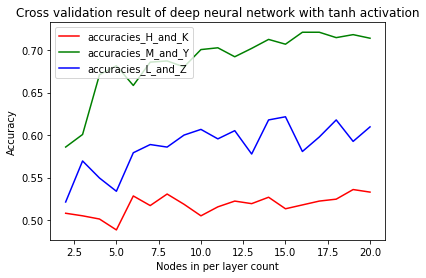

best node count per layer value for NN  with tanh activation is 19 with mean accuracy0.5358490586280823
best node count per layer value for NN  with tanh activation is 16 with mean accuracy0.7211267709732055
best node count per layer value for NN  with tanh activation is 15 with mean accuracy0.621561336517334


<Figure size 432x288 with 0 Axes>

In [14]:
Y_H_and_K_train_oneHot = np.array(pd.get_dummies(Y_H_and_K_train))
Y_M_and_Y_train_oneHot = np.array(pd.get_dummies(Y_M_and_Y_train))
Y_L_and_Z_train_oneHot = np.array(pd.get_dummies(Y_L_and_Z_train))


node_per_layer_H_and_K = np.arange(2,21,1)
node_per_layer_M_and_Y = np.arange(2,21,1)
node_per_layer_L_and_Z = np.arange(2,21,1)

accuracies_H_and_K = np.zeros(len(node_per_layer_H_and_K))
accuracies_M_and_Y = np.zeros(len(node_per_layer_M_and_Y))
accuracies_L_and_Z = np.zeros(len(node_per_layer_L_and_Z))

def NNtanh(node_per_layer, accuracies, X_pair_train, Y_pair_train_oneHot):
    for i, input in enumerate(node_per_layer):
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
            model = keras.Sequential(name="tanh_model")
            model.add(layers.Dense(input, activation="tanh"))
            model.add(layers.Dense(2, activation="softmax"))
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
            Y_train_fold, Y_test_fold = Y_pair_train_oneHot[train_index], Y_pair_train_oneHot[test_index]
            model.fit(X_train_fold, Y_train_fold, epochs = 10) 
            val_loss, val_acc = model.evaluate(X_test_fold, Y_test_fold, verbose=2)
            mean_accuracy += val_acc
        mean_accuracy /= crossValidationFold
        accuracies[i] = mean_accuracy

def plot(node_per_layer_H_and_K, node_per_layer_M_and_Y, node_per_layer_L_and_Z,
accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(node_per_layer_H_and_K, accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(node_per_layer_M_and_Y, accuracies_M_and_Y, color = 'g', label = "accuracies_M_and_Y")
    plt.plot(node_per_layer_L_and_Z, accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('Nodes in per layer count')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of deep neural network with tanh activation')
    plt.legend()
    plt.savefig('./NNtanhAfterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models, node_per_layer):
    best_node = node_per_layer[np.argmax(accuracies)]
    print('best node count per layer value for NN  with tanh activation is {} with mean accuracy{}'
    .format(best_node, max(accuracies)))
    best_models.append({
        'name': 'Model with tanh activation function',
        'best_node': best_node,
    })
NNtanh(node_per_layer_H_and_K, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train_oneHot)
NNtanh(node_per_layer_M_and_Y, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train_oneHot)
NNtanh(node_per_layer_L_and_Z, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train_oneHot)
#plot
plot(node_per_layer_H_and_K, node_per_layer_M_and_Y, node_per_layer_L_and_Z,
accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K, node_per_layer_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y, node_per_layer_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z, node_per_layer_L_and_Z)

Optional extension 2 - Consider more classification models, For this part, I will first try AdaBoost Classifier, and then:

1. An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.[12]

2.Logistic regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).[14] It's helpful for discrete dataset. I will apply L1-regularization and L2-regularization  as the hyperparameters.

For optional extension 2, first extended classification model AdaBoost classifier, the hyperparameter could be n_estimators

6.AdaBoost classifier

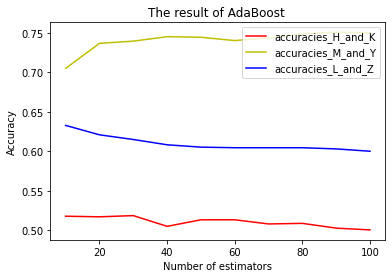

best n_estimators value AdaBoost Classifier is 30 with mean accuracy0.5184905660377359
best n_estimators value AdaBoost Classifier is 90 with mean accuracy0.7507042253521127
best n_estimators value AdaBoost Classifier is 10 with mean accuracy0.6327137546468402


<Figure size 432x288 with 0 Axes>

In [15]:
n_estimators_values = np.arange(10,101,10)
#For accuracy
accuracies_H_and_K = np.zeros(len(n_estimators_values))
accuracies_M_and_Y = np.zeros(len(n_estimators_values))
accuracies_L_and_Z = np.zeros(len(n_estimators_values))

def AdaBoost(n_estimators_values, accuracies, X_pair_train, Y_pair_train):
    for i, n_estimators in enumerate(n_estimators_values):
        model = AdaBoostClassifier(n_estimators = n_estimators)
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
            X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
            y_train_fold, y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
            model.fit(X_train_fold, y_train_fold)
            mean_accuracy += calculateAccuracy(model, X_test_fold, y_test_fold)
        mean_accuracy /= crossValidationFold
        accuracies[i] = mean_accuracy

def plot(n_estimators_values, accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    plt.plot(n_estimators_values, accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(n_estimators_values, accuracies_M_and_Y, color = 'y', label = "accuracies_M_and_Y")
    plt.plot(n_estimators_values, accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('Number of estimators')
    plt.ylabel('Accuracy')
    plt.title('The result of AdaBoost ')
    plt.legend()
    plt.savefig('./AdaBoostAfterDR.jpg')
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models):
    best_n_estimators = n_estimators_values[np.argmax(accuracies)]
    print('best n_estimators value AdaBoost Classifier is {} with mean accuracy{}'
    .format(best_n_estimators, max(accuracies)))
    best_models.append({
        'name': 'AdaBoost',
        'model': AdaBoostClassifier(n_estimators = best_n_estimators),
    })

#call function:
AdaBoost(n_estimators_values, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
AdaBoost(n_estimators_values, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
AdaBoost(n_estimators_values, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
plot(n_estimators_values, accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)

For optional extension 2, second extended classification model could apply a hyperparameter —— regularization, eith L1 or L2; besides, the hyperparameter could be C value for each of them

7.1 LogisticRegression with L1 regularization

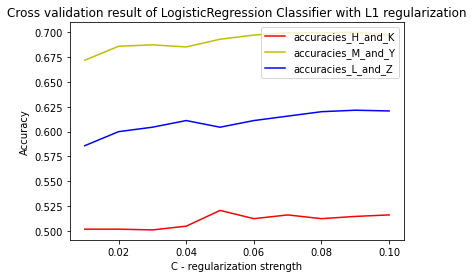

best C value LogisticRegression Classifier with L1 regularization is 0.05 with mean accuracy0.5207547169811321
best C value LogisticRegression Classifier with L1 regularization is 0.09 with mean accuracy0.7
best C value LogisticRegression Classifier with L1 regularization is 0.09 with mean accuracy0.6215613382899627


<Figure size 432x288 with 0 Axes>

In [16]:
#L1
from sklearn.linear_model import LogisticRegression
C_values = np.arange(0.01,0.11,0.01)
accuracies_H_and_K = np.zeros(len(C_values))
accuracies_M_and_Y = np.zeros(len(C_values))
accuracies_L_and_Z = np.zeros(len(C_values))

def logisticRegressionL1(C_values , accuracies, X_pair_train, Y_pair_train):
    for i, C in enumerate(C_values):
        model = LogisticRegression(penalty='l1', solver='liblinear', C = C)
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
            X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
            y_train_fold, y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
            model.fit(X_train_fold, y_train_fold)
            mean_accuracy += calculateAccuracy(model, X_test_fold, y_test_fold)
        mean_accuracy /= crossValidationFold
        accuracies[i] = mean_accuracy


def plot(C_values, accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    plt.plot(C_values, accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(C_values, accuracies_M_and_Y, color = 'y', label = "accuracies_M_and_Y")
    plt.plot(C_values, accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('C - regularization strength')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of LogisticRegression Classifier with L1 regularization')
    plt.legend()
    plt.savefig('./logisticRegressionL1AfterDR.jpg')
    plt.show()
    plt.clf()

# Save best model
def find_best_hyperparameter(accuracies, best_models):
    best_c = C_values[np.argmax(accuracies)]
    print('best C value LogisticRegression Classifier with L1 regularization is {} with mean accuracy{}'.format(best_c, max(accuracies)))
    best_models.append({
        'name': 'LogisticRegression Classifier with L1 regularization',
        'model': LogisticRegression(penalty='l1', solver='liblinear', C = best_c)
    })

logisticRegressionL1(C_values, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
logisticRegressionL1(C_values, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
logisticRegressionL1(C_values, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
plot(C_values, accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)

7.2 LogisticRegression with L2 regularization

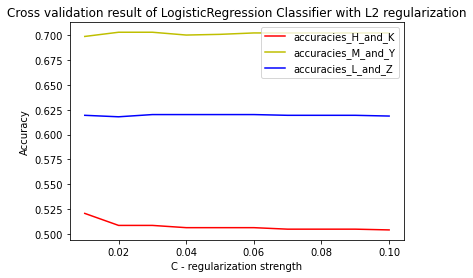

best C value LogisticRegression Classifier with L2 regularization is 0.01 with mean accuracy0.5207547169811321
best C value LogisticRegression Classifier with L2 regularization is 0.02 with mean accuracy0.7028169014084507
best C value LogisticRegression Classifier with L2 regularization is 0.03 with mean accuracy0.6200743494423792


<Figure size 432x288 with 0 Axes>

In [17]:
#L2
C_values = np.arange(0.01,0.11,0.01)
accuracies_H_and_K = np.zeros(len(C_values))
accuracies_M_and_Y = np.zeros(len(C_values))
accuracies_L_and_Z = np.zeros(len(C_values))

def logisticRegressionL2(C_values , accuracies, X_pair_train, Y_pair_train):
    for i, C in enumerate(C_values):
        model = LogisticRegression(penalty='l2',C = C, max_iter=1000)
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
            X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
            y_train_fold, y_test_fold = Y_pair_train[train_index], Y_pair_train[test_index]
            model.fit(X_train_fold, y_train_fold)
            mean_accuracy += calculateAccuracy(model, X_test_fold, y_test_fold)
        mean_accuracy /= crossValidationFold
        accuracies[i] = mean_accuracy

def plot(C_values, accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    plt.plot(C_values, accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(C_values, accuracies_M_and_Y, color = 'y', label = "accuracies_M_and_Y")
    plt.plot(C_values, accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('C - regularization strength')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of LogisticRegression Classifier with L2 regularization')
    plt.legend()
    plt.savefig('./logisticRegressionL2AfterDR.jpg')
    plt.show()
    plt.clf()


def find_best_hyperparameter(accuracies, best_models):
    best_c = C_values[np.argmax(accuracies)]
    print('best C value LogisticRegression Classifier with L2 regularization is {} with mean accuracy{}'.format(best_c, max(accuracies)))
    best_models.append({
        'name': 'LogisticRegression Classifier with L2 regularization',
        'model': LogisticRegression(penalty='l2', C = best_c )
    })

logisticRegressionL2(C_values, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train)
logisticRegressionL2(C_values, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train)
logisticRegressionL2(C_values, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train)
#plot
plot(C_values, accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K)
find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y)
find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z)

In [18]:
print(best_models_H_and_K)

[{'name': 'KNN', 'model': KNeighborsClassifier(n_neighbors=6)}, {'name': 'Decision Tree', 'model': DecisionTreeClassifier(max_depth=16, random_state=1)}, {'name': 'Random Forest', 'model': RandomForestClassifier(max_depth=10, random_state=1)}, {'name': 'SVM with linear kernal', 'model': SVC(degree=1, kernel='linear')}, {'name': 'SVM with RBF kernal', 'model': SVC(C=1.1)}, {'name': 'Model with sigmoid activation function', 'best_node': 7}, {'name': 'Model with Relu activation function', 'best_node': 7}, {'name': 'Model with tanh activation function', 'best_node': 19}, {'name': 'AdaBoost', 'model': AdaBoostClassifier(n_estimators=30)}, {'name': 'LogisticRegression Classifier with L1 regularization', 'model': LogisticRegression(C=0.05, penalty='l1', solver='liblinear')}, {'name': 'LogisticRegression Classifier with L2 regularization', 'model': LogisticRegression(C=0.01)}]


For final dataset validation, we should summerize the results of our best models.

In [19]:
#best_models_H_and_K 12
best_models_H_and_K = [{'name': 'KNN', 'model': KNeighborsClassifier(n_neighbors=1)}
, {'name': 'Decision Tree', 'model': DecisionTreeClassifier(max_depth=8, random_state=1)}
, {'name': 'Random Forest', 'model': RandomForestClassifier(max_depth=15, random_state=1)}
, {'name': 'SVM with Polynomial kernal', 'model': SVC(kernel='poly')}
, {'name': 'SVM with linear kernal', 'model': SVC(degree=1, kernel='linear')}
, {'name': 'SVM with RBF kernal', 'model': SVC(C=1.7000000000000002)}
# , {'name': 'Model with sigmoid activation function', 'best_node': 17}
# , {'name': 'Model with Relu activation function', 'best_node': 20}
# , {'name': 'Model with tanh activation function', 'best_node': 20}
, {'name': 'AdaBoost', 'model': AdaBoostClassifier(n_estimators=160)}
, {'name': 'LogisticRegression Classifier with L1 regularization', 'model': LogisticRegression(C=0.05, penalty='l1', solver='liblinear',max_iter=3000)}
, {'name': 'LogisticRegression Classifier with L2 regularization', 'model': LogisticRegression(C=0.13, max_iter=3000)}]


best_models_H_and_K_NN = [{'name': 'Model with sigmoid activation function', 'best_node': 20}
, {'name': 'Model with Relu activation function', 'best_node': 20}
, {'name': 'Model with tanh activation function', 'best_node': 17}]



In [20]:
#best_models_M_and_Y 12
best_models_M_and_Y = [{'name': 'KNN', 'model': KNeighborsClassifier(n_neighbors=1)}
, {'name': 'Decision Tree', 'model': DecisionTreeClassifier(max_depth=5, random_state=1)}
, {'name': 'Random Forest', 'model': RandomForestClassifier(max_depth=8, random_state=1)}
, {'name': 'SVM with Polynomial kernal', 'model': SVC(kernel='poly')}
, {'name': 'SVM with linear kernal', 'model': SVC(degree=1, kernel='linear')}
, {'name': 'SVM with RBF kernal', 'model': SVC(C=0.4)}
# , {'name': 'Model with sigmoid activation function', 'best_node': 20}
# , {'name': 'Model with Relu activation function', 'best_node': 16}
# , {'name': 'Model with tanh activation function', 'best_node': 18}
, {'name': 'AdaBoost', 'model': AdaBoostClassifier(n_estimators=200)}
, {'name': 'LogisticRegression Classifier with L1 regularization', 'model': LogisticRegression(C=0.14, penalty='l1', solver='liblinear')}
, {'name': 'LogisticRegression Classifier with L2 regularization', 'model': LogisticRegression(C=0.03)}]

best_models_M_and_Y_NN = [{'name': 'Model with sigmoid activation function', 'best_node': 19}
, {'name': 'Model with Relu activation function', 'best_node': 19}
, {'name': 'Model with tanh activation function', 'best_node': 17}]

In [21]:
#best_models_L_and_Z 12
best_models_L_and_Z = [{'name': 'KNN', 'model': KNeighborsClassifier(n_neighbors=1)}
, {'name': 'Decision Tree', 'model': DecisionTreeClassifier(max_depth=9, random_state=1)}
, {'name': 'Random Forest', 'model': RandomForestClassifier(max_depth=7, random_state=1)}
, {'name': 'SVM with Polynomial kernal', 'model': SVC(degree=2, kernel='poly')}
, {'name': 'SVM with linear kernal', 'model': SVC(degree=1, kernel='linear')}
, {'name': 'SVM with RBF kernal', 'model': SVC(C=1.8000000000000003)}
# , {'name': 'Model with sigmoid activation function', 'best_node': 19}
# , {'name': 'Model with Relu activation function', 'best_node': 15}
# , {'name': 'Model with tanh activation function', 'best_node': 19}
, {'name': 'AdaBoost', 'model': AdaBoostClassifier(n_estimators=190)}
, {'name': 'LogisticRegression Classifier with L1 regularization', 'model': LogisticRegression(C=0.14, penalty='l1', solver='liblinear')}
, {'name': 'LogisticRegression Classifier with L2 regularization', 'model': LogisticRegression(C=0.15000000000000002)}]

best_models_L_and_Z_NN = [{'name': 'Model with sigmoid activation function', 'best_node': 12}
, {'name': 'Model with Relu activation function', 'best_node': 20}
, {'name': 'Model with tanh activation function', 'best_node': 20}]

The final dataset test

In [22]:
import time

result_test_set = []

def testDataset(result_test_set, best_models,X_train, Y_train, X_test, Y_test):
    result_test_set = []
    for modelData in best_models:
        model = modelData['model'] #记录模型
        start_training = time.time()
        model.fit(X_train, Y_train) #当场训练模型导入x,y
        stop_training = time.time() - start_training
        start_time_test = time.time() #又开始计时
        validation_accuracy = calculateAccuracy(model, X_test, Y_test) #导入测试集合开始计算准确率
        stop_time_test = time.time() - start_time_test #计时结束
        result_test_set.append({
            'name' : modelData['name'],
            'model training time' : stop_training * 1000,
            'model operation time': stop_time_test * 1000, #这里可以改一下,100秒为结束单位
            'validation_accuracy': validation_accuracy,
        })
    return result_test_set

result_test_set_HK = testDataset(result_test_set, best_models_H_and_K,X_H_and_K_train,
Y_H_and_K_train, X_H_and_K_value, Y_H_and_K_value)

result_test_set_MY = testDataset(result_test_set, best_models_M_and_Y,X_M_and_Y_train,
Y_M_and_Y_train, X_M_and_Y_value, Y_M_and_Y_value)

result_test_set_LZ = testDataset(result_test_set, best_models_L_and_Z,X_L_and_Z_train,
Y_L_and_Z_train, X_L_and_Z_value, Y_L_and_Z_value)

print(result_test_set_HK)
print(result_test_set_MY)
print(result_test_set_LZ)

[{'name': 'KNN', 'model training time': 1.9793510437011719, 'model operation time': 3.9873123168945312, 'validation_accuracy': 0.5405405405405406}, {'name': 'Decision Tree', 'model training time': 1.9931793212890625, 'model operation time': 0.0, 'validation_accuracy': 0.5540540540540541}, {'name': 'Random Forest', 'model training time': 185.52684783935547, 'model operation time': 12.854576110839844, 'validation_accuracy': 0.5067567567567568}, {'name': 'SVM with Polynomial kernal', 'model training time': 167.4478054046631, 'model operation time': 4.93311882019043, 'validation_accuracy': 0.5135135135135135}, {'name': 'SVM with linear kernal', 'model training time': 83.7242603302002, 'model operation time': 4.984140396118164, 'validation_accuracy': 0.5405405405405406}, {'name': 'SVM with RBF kernal', 'model training time': 106.69946670532227, 'model operation time': 17.943859100341797, 'validation_accuracy': 0.5675675675675675}, {'name': 'AdaBoost', 'model training time': 255.271673202514

In [23]:
# sigmoid
sigmoid_model_HK = keras.Sequential(name="sigmoid_model_HK")
sigmoid_model_HK.add(layers.Dense(17, activation="sigmoid"))
sigmoid_model_HK.add(layers.Dense(2, activation="softmax"))
sigmoid_model_HK.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

sigmoid_model_MY = keras.Sequential(name="sigmoid_model_MY")
sigmoid_model_MY.add(layers.Dense(20, activation="sigmoid"))
sigmoid_model_MY.add(layers.Dense(2, activation="softmax"))
sigmoid_model_MY.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

sigmoid_model_LZ = keras.Sequential(name="sigmoid_model_LZ")
sigmoid_model_LZ.add(layers.Dense(19, activation="sigmoid"))
sigmoid_model_LZ.add(layers.Dense(2, activation="softmax"))
sigmoid_model_LZ.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#relu
relu_model_HK = keras.Sequential(name="relu_model_HK")
relu_model_HK.add(layers.Dense(20, activation="relu"))
relu_model_HK.add(layers.Dense(2, activation="softmax"))
relu_model_HK.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

relu_model_MY = keras.Sequential(name="relu_model_MY")
relu_model_MY.add(layers.Dense(16, activation="relu"))
relu_model_MY.add(layers.Dense(2, activation="softmax"))
relu_model_MY.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

relu_model_LZ = keras.Sequential(name="relu_model_LZ")
relu_model_LZ.add(layers.Dense(15, activation="relu"))
relu_model_LZ.add(layers.Dense(2, activation="softmax"))
relu_model_LZ.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#tanh
tanh_model_HK = keras.Sequential(name="tanh_model_HK")
tanh_model_HK.add(layers.Dense(20, activation="tanh"))
tanh_model_HK.add(layers.Dense(2, activation="softmax"))
tanh_model_HK.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

tanh_model_MY = keras.Sequential(name="tanh_model_MY")
tanh_model_MY.add(layers.Dense(16, activation="tanh"))
tanh_model_MY.add(layers.Dense(2, activation="softmax"))
tanh_model_MY.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

tanh_model_LZ = keras.Sequential(name="tanh_model_LZ")
tanh_model_LZ.add(layers.Dense(15, activation="tanh"))
tanh_model_LZ.add(layers.Dense(2, activation="softmax"))
tanh_model_LZ.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

best_NN_model_HK = [
    {
        'model': sigmoid_model_HK,
        'name': 'NN with Sigmoid activation',
    }, 
    {
        'model': relu_model_HK,
        'name': 'NN with ReLU activation',
    },
    {
        'model': tanh_model_HK,
        'name': 'NN with tanh activation',
    }
]

best_NN_model_MY = [
    {
        'model': sigmoid_model_MY,
        'name': 'NN with Sigmoid activation',
    }, 
    {
        'model': relu_model_MY,
        'name': 'NN with ReLU activation',
    },
    {
        'model': tanh_model_MY,
        'name': 'NN with tanh activation',
    }
]

best_NN_model_LZ = [
    {
        'model': sigmoid_model_LZ,
        'name': 'NN with Sigmoid activation',
    }, 
    {
        'model': relu_model_LZ,
        'name': 'NN with ReLU activation',
    },
    {
        'model': tanh_model_LZ,
        'name': 'NN with tanh activation',
    }
]



Y_H_and_K_train_oneHot = np.array(pd.get_dummies(Y_H_and_K_train))
Y_M_and_Y_train_oneHot = np.array(pd.get_dummies(Y_M_and_Y_train))
Y_L_and_Z_train_oneHot = np.array(pd.get_dummies(Y_L_and_Z_train))

Y_H_and_K_value_oneHot = np.array(pd.get_dummies(Y_H_and_K_value))
Y_M_and_Y_value_oneHot = np.array(pd.get_dummies(Y_M_and_Y_value))
Y_L_and_Z_value_oneHot = np.array(pd.get_dummies(Y_L_and_Z_value))

In [24]:
def testDataset_NN(result_test_set, best_NN_model ,X_train, Y_train_oneHot, X_test, Y_test_oneHot):
    for model in best_NN_model:
        model = model['model']
        start_training = time.time()
        model.fit(X_train, Y_train_oneHot, epochs=30)
        stop_training = time.time()  - start_training 
        start_testing = time.time()
        _, validation_accuracy = model.evaluate(X_test, Y_test_oneHot, verbose=2)
        stop_testing = time.time() - start_testing
        result_test_set.append({
            'name': model.name,
            'model training time' : stop_training * 1000,
            'model operation time': stop_testing * 1000,
            'validation_accuracy': validation_accuracy,
        })

testDataset_NN(result_test_set_HK , best_NN_model_HK ,X_H_and_K_train, Y_H_and_K_train_oneHot, X_H_and_K_value, Y_H_and_K_value_oneHot)
testDataset_NN(result_test_set_MY, best_NN_model_MY ,X_M_and_Y_train, Y_M_and_Y_train_oneHot, X_M_and_Y_value, Y_M_and_Y_value_oneHot)
testDataset_NN(result_test_set_LZ, best_NN_model_LZ ,X_L_and_Z_train, Y_L_and_Z_train_oneHot, X_L_and_Z_value, Y_L_and_Z_value_oneHot)



Epoch 1/30
42/42 [==============================] - 0s 842us/step - loss: 0.7093 - accuracy: 0.4943
Epoch 2/30
42/42 [==============================] - 0s 664us/step - loss: 0.6998 - accuracy: 0.5094
Epoch 3/30
42/42 [==============================] - 0s 569us/step - loss: 0.6964 - accuracy: 0.5177
Epoch 4/30
42/42 [==============================] - 0s 641us/step - loss: 0.6951 - accuracy: 0.5260
Epoch 5/30
42/42 [==============================] - 0s 688us/step - loss: 0.6945 - accuracy: 0.5042
Epoch 6/30
42/42 [==============================] - 0s 578us/step - loss: 0.6937 - accuracy: 0.5109
Epoch 7/30
42/42 [==============================] - 0s 617us/step - loss: 0.6934 - accuracy: 0.5064
Epoch 8/30
42/42 [==============================] - 0s 712us/step - loss: 0.6926 - accuracy: 0.5094
Epoch 9/30
42/42 [==============================] - 0s 688us/step - loss: 0.6919 - accuracy: 0.5238
Epoch 10/30
42/42 [==============================] - 0s 664us/step - loss: 0.6919 - accuracy: 0.5291

creat file for the result for report

In [26]:
def makeFile(result_test_set_HK, result_test_set_MY, result_test_set_LZ):
    df_HK = pd.DataFrame.from_dict(result_test_set_HK) 
    df_MY = pd.DataFrame.from_dict(result_test_set_MY) 
    df_LZ = pd.DataFrame.from_dict(result_test_set_LZ) 
    df_HK.to_csv (r'Result of test set HK after variance explained selections.csv', index = False, header=True)
    df_MY.to_csv (r'Result of test set MY after variance explained selections.csv', index = False, header=True)
    df_LZ.to_csv (r'Result of test set LZ after variance explained selections.csv', index = False, header=True)    

makeFile(result_test_set_HK, result_test_set_MY, result_test_set_LZ)

Reference:

0.for missing value: https://scikit-learn.org/stable/modules/impute.html?highlight=knnimputer

1.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

2.https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

3.https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

4.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

5.ANN reference:https://www.springboard.com/blog/data-science/beginners-guide-neural-network-in-python-scikit-learn-0-18/

6.https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm

7.https://datascience.stackexchange.com/questions/58961/sklearn-accuracy-scorey-test-y-predict-vs-np-meany-predict-y-test（For accuary)

8.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html(For kFold)

9.https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html(for SVM with RBF)

10.https://www.ibm.com/cloud/learn/neural-networks#:~:text=Neural%20networks%2C%20also%20known%20as,neurons%20signal%20to%20one%20another.

11.https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=get%20started%20%3A)-,What%20is%20a%20Neural%20Network%20Activation%20Function%3F,prediction%20using%20simpler%20mathematical%20operations.

12.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

13.https://blog.csdn.net/TeFuirnever/article/details/100276569

14.https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression).

15.https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model(For Bonus classification)

16.https://vitalflux.com/keras-categorical-cross-entropy-loss-function/

17.https://pythonguides.com/python-dictionary-to-csv/

18.https://ljalphabeta.gitbooks.io/python-/content/variance.html[算主成分]